# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\British Airways Data Science\customer_booking.csv', encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking



In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

In [8]:
df.duplicated().value_counts()

False    49281
True       719
dtype: int64

In [9]:
# drop duplicated rows:
df=df.drop_duplicates()

In [10]:
df.route.value_counts()

AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [11]:
df.sales_channel.value_counts()

Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64

In [12]:
df.trip_type.value_counts()

RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64

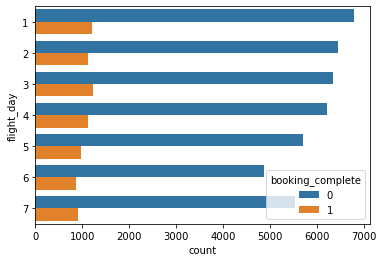

In [13]:
sns.countplot(y='flight_day',
             data=df, 
             hue='booking_complete'
             );

In [14]:
route=df.groupby('route')['booking_complete'].value_counts().reset_index(name='count')
pivot_route = route.pivot(index='route', columns='booking_complete', values='count')

# Calculate the ratio of 1's to 0's for each trip type
pivot_route['ratio'] = pivot_route[1] / pivot_route[0]
pivot_route

booking_complete,0,1,ratio
route,,,
AKLDEL,20.0,NaN,NaN
AKLHGH,1.0,NaN,NaN
AKLHND,2.0,NaN,NaN
AKLICN,69.0,NaN,NaN
AKLKIX,8.0,NaN,NaN
...,...,...,...
TRZWUH,10.0,NaN,NaN
TRZXIY,6.0,NaN,NaN
TWUWUH,1.0,1.0,1.0


In [15]:
#Route having only booking incomplete (0) and complete (1)
Route_booking_incomplete=pivot_route[pivot_route[1].isnull() == True]
Route_booking_complete=pivot_route[pivot_route[0].isnull() == True]

In [16]:
Route_booking_incomplete

booking_complete,0,1,ratio
route,,,
AKLDEL,20.0,NaN,NaN
AKLHGH,1.0,NaN,NaN
AKLHND,2.0,NaN,NaN
AKLICN,69.0,NaN,NaN
AKLKIX,8.0,NaN,NaN
...,...,...,...
TPEURT,1.0,NaN,NaN
TPEVTE,2.0,NaN,NaN
TRZWUH,10.0,NaN,NaN


In [17]:
Route_booking_complete

booking_complete,0,1,ratio
route,,,
AORPER,NaN,1.0,NaN
AORPUS,NaN,1.0,NaN
CKGKNO,NaN,1.0,NaN
CKGSGN,NaN,1.0,NaN
CXRMEL,NaN,1.0,NaN
HDYOOL,NaN,5.0,NaN
JEDPEN,NaN,1.0,NaN
JOGKTM,NaN,1.0,NaN
KCHMRU,NaN,1.0,NaN


In [18]:
booking_origin=df.groupby('booking_origin')['booking_complete'].value_counts().reset_index(name='count')
pivot_booking_origin = booking_origin.pivot(index='booking_origin', columns='booking_complete', values='count')

# Calculate the ratio of 1's to 0's for each trip type
pivot_booking_origin['ratio'] = pivot_booking_origin[1] / pivot_booking_origin[0]
pivot_booking_origin

booking_complete,0,1,ratio
booking_origin,,,
(not set),64.0,14.0,0.218750
Afghanistan,1.0,NaN,NaN
Algeria,1.0,NaN,NaN
Argentina,6.0,NaN,NaN
Australia,16796.0,895.0,0.053286
...,...,...,...
United Arab Emirates,39.0,3.0,0.076923
United Kingdom,152.0,21.0,0.138158
United States,370.0,83.0,0.224324


In [19]:
#Booking_origin having only booking incomplete (0) and complete (1)
Origin_booking_incomplete=pivot_booking_origin[pivot_booking_origin[1].isnull() == True]
Origin_booking_complete=pivot_booking_origin[pivot_booking_origin[0].isnull() == True]

In [20]:
Origin_booking_incomplete

booking_complete,0,1,ratio
booking_origin,,,
Afghanistan,1.0,NaN,NaN
Algeria,1.0,NaN,NaN
Argentina,6.0,NaN,NaN
Austria,8.0,NaN,NaN
Belarus,1.0,NaN,NaN
Bhutan,1.0,NaN,NaN
Brazil,9.0,NaN,NaN
Bulgaria,1.0,NaN,NaN
Colombia,4.0,NaN,NaN


In [21]:
Origin_booking_complete

booking_complete,0,1,ratio
booking_origin,,,
Iraq,NaN,1.0,NaN
Pakistan,NaN,1.0,NaN
Seychelles,NaN,1.0,NaN
Vanuatu,NaN,1.0,NaN


In [22]:
trip=df.groupby('trip_type')['booking_complete'].value_counts().reset_index(name='count')
pivot_trip = trip.pivot(index='trip_type', columns='booking_complete', values='count')

# Calculate the ratio of 1's to 0's for each trip type
pivot_trip['ratio'] = pivot_trip[1] / pivot_trip[0]
pivot_trip

booking_complete,0,1,ratio
trip_type,,,
CircleTrip,111,5,0.045045
OneWay,366,20,0.054645
RoundTrip,41413,7366,0.177867


In [23]:
sales_channel=df.groupby('sales_channel')['booking_complete'].value_counts().reset_index(name='count')
pivot_channel =sales_channel.pivot(index='sales_channel', columns='booking_complete', values='count')

# Calculate the ratio of 1's to 0's for each trip type
pivot_channel['ratio'] = pivot_channel[1] / pivot_channel[0]
pivot_channel

booking_complete,0,1,ratio
sales_channel,,,
Internet,37115,6802,0.183268
Mobile,4775,589,0.123351


In [24]:
# convert sales_channel and trip_type into numerical variables:
df_encoded=pd.get_dummies(df, columns=['sales_channel','trip_type'])
df_encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,1,0,0,0,1
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,1,0,0,0,1
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,1,0,0,0,1
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,1,0,0,0,1


### Target variable distribution

<AxesSubplot:xlabel='booking_complete', ylabel='count'>

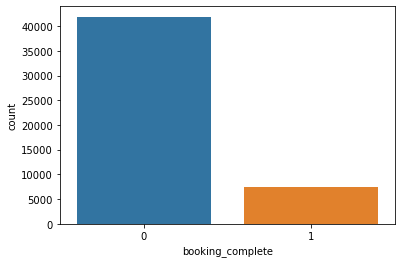

In [25]:
sns.countplot(data=df_encoded, x='booking_complete')

In [26]:
df_encoded.booking_complete.value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

As can be seen, the distribution of 2 target labels (0 and 1) is not relatively equal or balanced which is very likely to lead to a bias training model. Treatment is to downsample the majority label which is 0, so that the new training dataset would contains 14782 records (7391 for each label).

But before we carry out this technique, it is worth to take a look again at the 2 categorical variables booking_origin and route and evaluate their relationship with the booking_complete. When dropping rows of incomplete booking (0), it makes more sense to drop first the rows having booking_origins associated with sheer incomplete bookings (0 complete booking). The same applies with dropping the rows having routes associated with sheer imcomplete bookings. Hence, the new training dataset would possibly give a better input to ML model.

In [27]:
Origin_booking_incomplete.reset_index(inplace=True)

In [28]:
# Remove rows having booking_origins associated with sheer incomplete bookings
merged_origin = df_encoded.merge(Origin_booking_incomplete, on='booking_origin', how='left', indicator=True)
booking_origin_complete = merged_origin[merged_origin['_merge'] != 'both']
booking_origin_complete
#merged_origin
#merged_origin._merge.value_counts()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,0,1,ratio,_merge
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,...,0,1,0,0,0,1,NaN,NaN,NaN,left_only
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,...,0,1,0,0,0,1,NaN,NaN,NaN,left_only
2,2,243,22,17,3,AKLDEL,India,1,1,0,...,0,1,0,0,0,1,NaN,NaN,NaN,left_only
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,...,0,1,0,0,0,1,NaN,NaN,NaN,left_only
4,2,68,22,15,3,AKLDEL,India,1,0,1,...,0,1,0,0,0,1,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49276,2,27,6,9,6,PERPNH,Australia,1,0,1,...,0,1,0,0,0,1,NaN,NaN,NaN,left_only
49277,1,111,6,4,7,PERPNH,Australia,0,0,0,...,0,1,0,0,0,1,NaN,NaN,NaN,left_only
49278,1,24,6,22,6,PERPNH,Australia,0,0,1,...,0,1,0,0,0,1,NaN,NaN,NaN,left_only
49279,1,15,6,11,1,PERPNH,Australia,1,0,1,...,0,1,0,0,0,1,NaN,NaN,NaN,left_only


In [29]:
Route_booking_incomplete.reset_index(inplace=True)

In [30]:
# Remove rows having routes associated with sheer incomplete bookings
merged_route = booking_origin_complete.drop(['_merge'], axis=1).merge(Route_booking_incomplete, on='route', how='left', indicator=True)
Origin_route_combined= merged_route[merged_route['_merge'] != 'both']
Origin_route_combined
#merged_route

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,0_x,1_x,ratio_x,0_y,1_y,ratio_y,_merge
82,1,15,31,17,1,AKLKUL,Malaysia,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
83,1,31,274,10,2,AKLKUL,Malaysia,1,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
84,1,316,35,16,2,AKLKUL,Malaysia,1,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
85,2,232,17,3,2,AKLKUL,Malaysia,1,1,1,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
86,1,156,19,14,1,AKLKUL,Malaysia,1,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49135,2,27,6,9,6,PERPNH,Australia,1,0,1,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
49136,1,111,6,4,7,PERPNH,Australia,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
49137,1,24,6,22,6,PERPNH,Australia,0,0,1,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
49138,1,15,6,11,1,PERPNH,Australia,1,0,1,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [31]:
# downsampling the booking that is incomplete:
df0 = Origin_route_combined[Origin_route_combined['booking_complete'] == 0].sample(n=7391, random_state=42)
df0

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,0_x,1_x,ratio_x,0_y,1_y,ratio_y,_merge
35913,1,17,5,12,1,DADOOL,Australia,0,1,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
39830,3,273,5,22,7,LGKPEK,China,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
48669,1,51,6,3,1,PEKTWU,China,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
10697,1,79,40,14,1,DPSPEK,China,1,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
17498,1,29,60,8,3,KTMPEN,Malaysia,1,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21693,1,46,40,14,6,OOLSZX,Australia,1,0,1,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
30376,2,162,4,2,2,DMKKIX,Thailand,1,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
35124,1,24,5,14,7,CGKICN,South Korea,0,0,1,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
605,1,14,18,11,3,AKLKUL,New Zealand,1,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [32]:
# concatenate the sampled_data with the other sample having complete booking:
df1 = Origin_route_combined[Origin_route_combined['booking_complete'] == 1].sample(n=7391, random_state=42)
df1.reset_index(drop=True, inplace=True)
df0.reset_index(drop=True, inplace=True)

dataset = pd.concat([df0, df1], axis = 0)
dataset = dataset.reset_index(drop=True)
dataset

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,0_x,1_x,ratio_x,0_y,1_y,ratio_y,_merge
0,1,17,5,12,1,DADOOL,Australia,0,1,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,3,273,5,22,7,LGKPEK,China,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,1,51,6,3,1,PEKTWU,China,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,1,79,40,14,1,DPSPEK,China,1,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,1,29,60,8,3,KTMPEN,Malaysia,1,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14777,2,22,5,13,5,ICNMLE,South Korea,0,1,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
14778,1,3,5,17,4,ICNPEN,India,1,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
14779,1,20,5,3,1,KIXPEN,Malaysia,1,1,1,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only
14780,2,88,86,3,1,COKSYD,India,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [33]:
try:
    print("Length of Origin_route_combined:", len(Origin_route_combined))
    print("Length of df0:", len(df0))
    dataset = pd.concat([df1, df0], axis=0)
    print("Length of concatenated dataset:", len(dataset))
    print("Length of df1:", len(df1))
except Exception as e:
    print("Error during concatenation:", e)


Length of Origin_route_combined: 46497
Length of df0: 7391
Length of concatenated dataset: 14782
Length of df1: 7391


In [34]:
dataset.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip',
       '0_x', '1_x', 'ratio_x', '0_y', '1_y', 'ratio_y', '_merge'],
      dtype='object')

In [35]:
dataset=dataset[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip','booking_complete']]


In [36]:
dataset[dataset.booking_complete == 1]

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,booking_complete
0,1,2,6,15,6,PENPVG,Malaysia,0,0,0,5.33,1,0,0,0,1,1
1,1,20,6,11,1,ICNPEN,Malaysia,1,0,0,6.62,1,0,0,0,1,1
2,1,35,93,8,3,JHBKTM,Malaysia,1,0,1,4.75,1,0,0,0,1,1
3,1,215,5,22,5,KIXPEN,Malaysia,1,0,0,7.00,1,0,0,0,1,1
4,4,15,5,2,1,ICNKCH,South Korea,1,1,1,6.62,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,2,22,5,13,5,ICNMLE,South Korea,0,1,0,6.62,1,0,0,0,1,1
7387,1,3,5,17,4,ICNPEN,India,1,0,0,6.62,1,0,0,0,1,1
7388,1,20,5,3,1,KIXPEN,Malaysia,1,1,1,7.00,1,0,0,0,1,1
7389,2,88,86,3,1,COKSYD,India,0,0,0,8.58,1,0,0,0,1,1


In [37]:
dataset.booking_complete.value_counts()

1    7391
0    7391
Name: booking_complete, dtype: int64

## Feature engineering/Selection

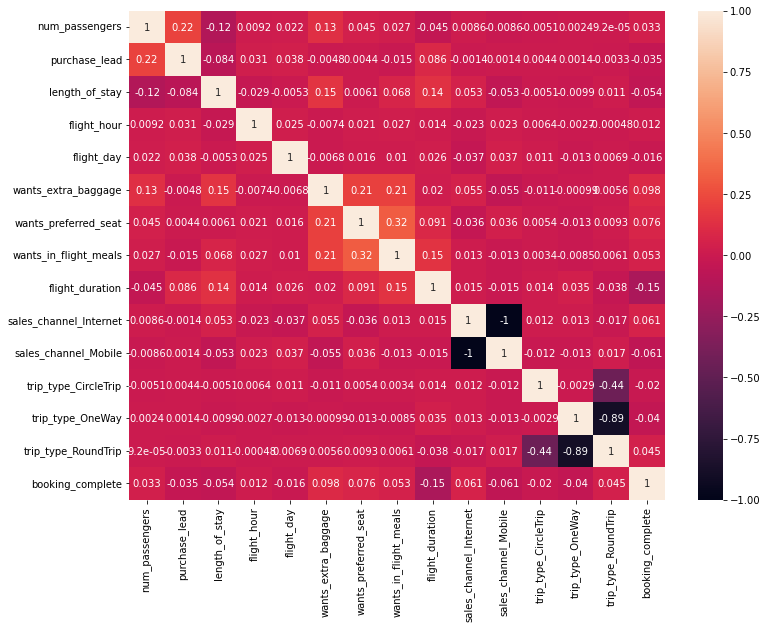

In [38]:
plt.figure(figsize=(12, 9))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [39]:
corr_coeff=[]
def corr_coeff_exam(x):
    global corr_coeff
    column_names = x.columns
    for a in range(len(column_names)):
        for b in range(a + 1, len(column_names)):
            col1 = column_names[a]
            col2 = column_names[b]
            abs_correlation_coefficient = abs(x[col1].corr(x[col2]))
            
            if abs_correlation_coefficient < 0.3:
                rank = 'weak'
            elif 0.3 <= abs_correlation_coefficient < 0.5:
                rank = 'moderate'
            else:
                rank = 'strong'
            
            # Store the column pair and its rank as a dictionary
            corr_coeff.append({
                'column_pair': (col1, col2),
                'rank': rank
            })
    
    return corr_coeff


In [40]:
numerical_dataset=dataset.drop(['booking_origin','route'], axis=1)
corr_coeff_exam(numerical_dataset)

[{'column_pair': ('num_passengers', 'purchase_lead'), 'rank': 'weak'},
 {'column_pair': ('num_passengers', 'length_of_stay'), 'rank': 'weak'},
 {'column_pair': ('num_passengers', 'flight_hour'), 'rank': 'weak'},
 {'column_pair': ('num_passengers', 'flight_day'), 'rank': 'weak'},
 {'column_pair': ('num_passengers', 'wants_extra_baggage'), 'rank': 'weak'},
 {'column_pair': ('num_passengers', 'wants_preferred_seat'), 'rank': 'weak'},
 {'column_pair': ('num_passengers', 'wants_in_flight_meals'), 'rank': 'weak'},
 {'column_pair': ('num_passengers', 'flight_duration'), 'rank': 'weak'},
 {'column_pair': ('num_passengers', 'sales_channel_Internet'), 'rank': 'weak'},
 {'column_pair': ('num_passengers', 'sales_channel_Mobile'), 'rank': 'weak'},
 {'column_pair': ('num_passengers', 'trip_type_CircleTrip'), 'rank': 'weak'},
 {'column_pair': ('num_passengers', 'trip_type_OneWay'), 'rank': 'weak'},
 {'column_pair': ('num_passengers', 'trip_type_RoundTrip'), 'rank': 'weak'},
 {'column_pair': ('num_pas

In [41]:
corr_exam=pd.DataFrame(corr_coeff_exam(numerical_dataset))
corr_exam

,column_pair,rank
0,"(num_passengers, purchase_lead)",weak
1,"(num_passengers, length_of_stay)",weak
2,"(num_passengers, flight_hour)",weak
3,"(num_passengers, flight_day)",weak
4,"(num_passengers, wants_extra_baggage)",weak
...,...,...
205,"(trip_type_CircleTrip, trip_type_RoundTrip)",moderate
206,"(trip_type_CircleTrip, booking_complete)",weak
207,"(trip_type_OneWay, trip_type_RoundTrip)",strong
208,"(trip_type_OneWay, booking_complete)",weak


In [42]:
corr_exam[corr_exam['rank']=='strong'].value_counts()

column_pair                                     rank  
(sales_channel_Internet, sales_channel_Mobile)  strong    2
(trip_type_OneWay, trip_type_RoundTrip)         strong    2
dtype: int64

According to the result of corr_coeff_exam, the result of most predictive variables are mostly weak or moderate.

However, the correlation coefficient between sales_channel_internet and mobile is mutually exclusive and absolutely negative correlated. The similar behaviour is obserbed between trip_type One way and Round Trip. Moreover, each individual sales_channel and trip_type just has very weak or moderate correlation with booking_complete.This indicates that these significantly correlated pairs of individual feature should either be combined back into the original feature or dropped from the model in order to reinforce the model reliability. 

In [43]:
# Convert trip_type back into categorical variables

conditions_trip = [
    (dataset['trip_type_OneWay'] == 1) & (dataset['trip_type_RoundTrip'] == 0) & (dataset['trip_type_CircleTrip'] == 0),
    (dataset['trip_type_OneWay'] == 0) & (dataset['trip_type_RoundTrip'] == 1) & (dataset['trip_type_CircleTrip'] == 0),
    (dataset['trip_type_OneWay'] == 0) & (dataset['trip_type_RoundTrip'] == 0) & (dataset['trip_type_CircleTrip'] == 1)
]

values_trip = ['OneWay', 'RoundTrip', 'CircleTrip']

# Create the new column based on conditions
dataset['trip_type'] = np.select(conditions_trip, values_trip, default='None')


In [44]:

conditions_sales_channel  = [
    (dataset['sales_channel_Mobile'] == 1) & (dataset['sales_channel_Internet'] == 0),
    (dataset['sales_channel_Mobile'] == 0) & (dataset['sales_channel_Internet'] == 1)
]

values_sales_channel = ['Mobile', 'Internet']

# Create the new column based on conditions
dataset['sales_channel'] = np.select(conditions_sales_channel, values_sales_channel, default='None')

In [45]:
dataset=dataset.drop(['trip_type_OneWay','trip_type_RoundTrip','trip_type_CircleTrip','sales_channel_Mobile','sales_channel_Internet'], axis=1)
dataset

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type,sales_channel
0,1,2,6,15,6,PENPVG,Malaysia,0,0,0,5.33,1,RoundTrip,Internet
1,1,20,6,11,1,ICNPEN,Malaysia,1,0,0,6.62,1,RoundTrip,Internet
2,1,35,93,8,3,JHBKTM,Malaysia,1,0,1,4.75,1,RoundTrip,Internet
3,1,215,5,22,5,KIXPEN,Malaysia,1,0,0,7.00,1,RoundTrip,Internet
4,4,15,5,2,1,ICNKCH,South Korea,1,1,1,6.62,1,RoundTrip,Internet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,1,46,40,14,6,OOLSZX,Australia,1,0,1,8.83,0,RoundTrip,Internet
7387,2,162,4,2,2,DMKKIX,Thailand,1,0,0,7.00,0,RoundTrip,Internet
7388,1,24,5,14,7,CGKICN,South Korea,0,0,1,6.62,0,RoundTrip,Internet
7389,1,14,18,11,3,AKLKUL,New Zealand,1,0,0,8.83,0,RoundTrip,Internet


# Examining relationship of the categorical variables (booking_origin, route, sales_channel, trip_type) with target variable (booking_complete)
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
X_Cat=dataset[['booking_origin','route', 'sales_channel', 'trip_type']]
Y= dataset.booking_complete
#convert categorical data into numerical
label_encoder = LabelEncoder()
for column in X_Cat.columns:
    X_Cat[column] = label_encoder.fit_transform(X_Cat[column])
#select the 2 most important features with highest chi-squared statistics
chi2_features= SelectKBest(chi2, k=2)
X_kbestfeatures= chi2_features.fit_transform(X_Cat, Y)
#reduce features
print('Original feature number:', X_Cat.shape[1])
print('Reduced feature number:',X_kbestfeatures.shape[1])
#selected features name
selected_features_mask = chi2_features.get_support()
selected_feature_names = X_Cat.columns[selected_features_mask]
print('selected features are:', selected_feature_names)

There are 2 important categorical features selected from 4 original ones which are booking_origin and sales_channel.

# Drop the other categorical features off the dataset:
dataset=dataset.drop(['route','trip_type'], axis =1)
dataset

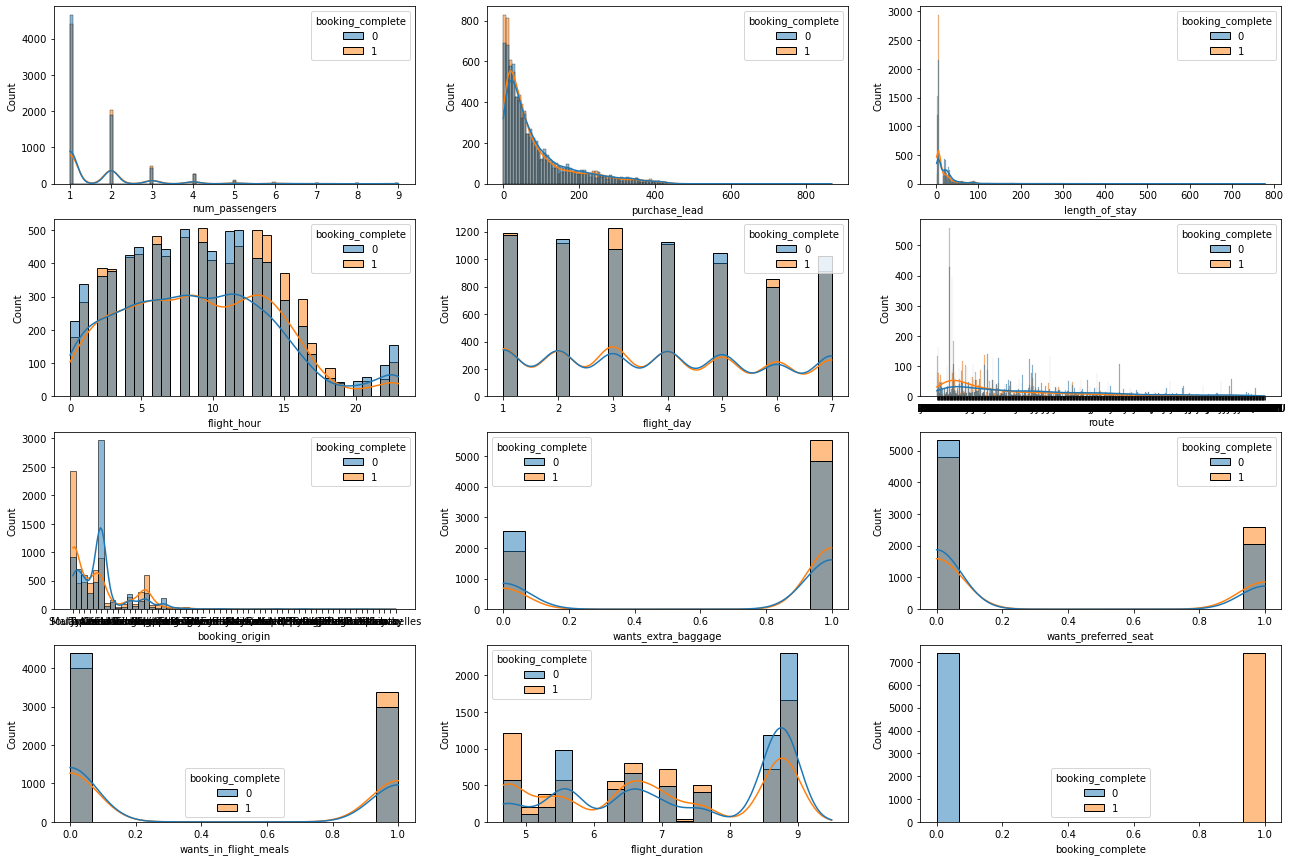

In [47]:
fig, axs = plt.subplots(4, 3, figsize=(22, 15))
for col_name, ax in zip(dataset.columns, axs.ravel()):
    sns.histplot(data=dataset, x=col_name,hue='booking_complete', kde=True, ax=ax)

### Solving skewness issue: Standardise the data
Since some data such as purchase lead, length of stay,  are not normally distributed but rather skewed as seen above. In order to handle this, we have to apply logarithmic or power transformations to reduce the impact of outliers by replacing them with values closer to the rest of the data. 

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [49]:
# For the purpose of normalizing the skewed data, temporily remove the dummy features (0 & 1), categorical features and ordinal feature (flight_day)
X, y = dataset.drop(columns=['route','trip_type','booking_origin','sales_channel','booking_complete','flight_day','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']), dataset['booking_complete']
y = y.gt(0).astype(int)

In [50]:
def negative_log(x):
    return np.sign(x)*np.log(np.abs(x))

In [51]:
X_numeric = X.apply(pd.to_numeric, errors='coerce')
scaler = RobustScaler()
X_scaled = scaler.fit_transform(np.log1p(X_numeric))
X_scaled

array([[ 0.        , -1.66309074,  0.        ,  0.55470886, -0.59224767],
       [ 0.        , -0.51280538,  0.        ,  0.21518   , -0.1230959 ],
       [ 0.        , -0.19418852,  1.68612613, -0.12434885, -0.83532835],
       ...,
       [ 0.        , -0.40973991, -0.10006893,  0.47853904, -0.1230959 ],
       [ 0.        , -0.71170413,  0.64820802,  0.21518   ,  0.52105918],
       [ 1.        ,  0.38560882, -0.21842534, -0.26335904, -0.1230959 ]])

In [52]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration
0,0.000000,-1.663091,0.000000,0.554709,-0.592248
1,0.000000,-0.512805,0.000000,0.215180,-0.123096
2,0.000000,-0.194189,1.686126,-0.124349,-0.835328
3,0.000000,0.864974,-0.100069,0.983018,0.000000
4,2.259851,-0.673553,-0.100069,-1.420956,-0.123096
...,...,...,...,...,...
7386,0.000000,-0.036576,1.147501,0.478539,0.521059
7387,1.000000,0.698554,-0.218425,-1.420956,0.000000
7388,0.000000,-0.409740,-0.100069,0.478539,-0.123096
7389,0.000000,-0.711704,0.648208,0.215180,0.521059


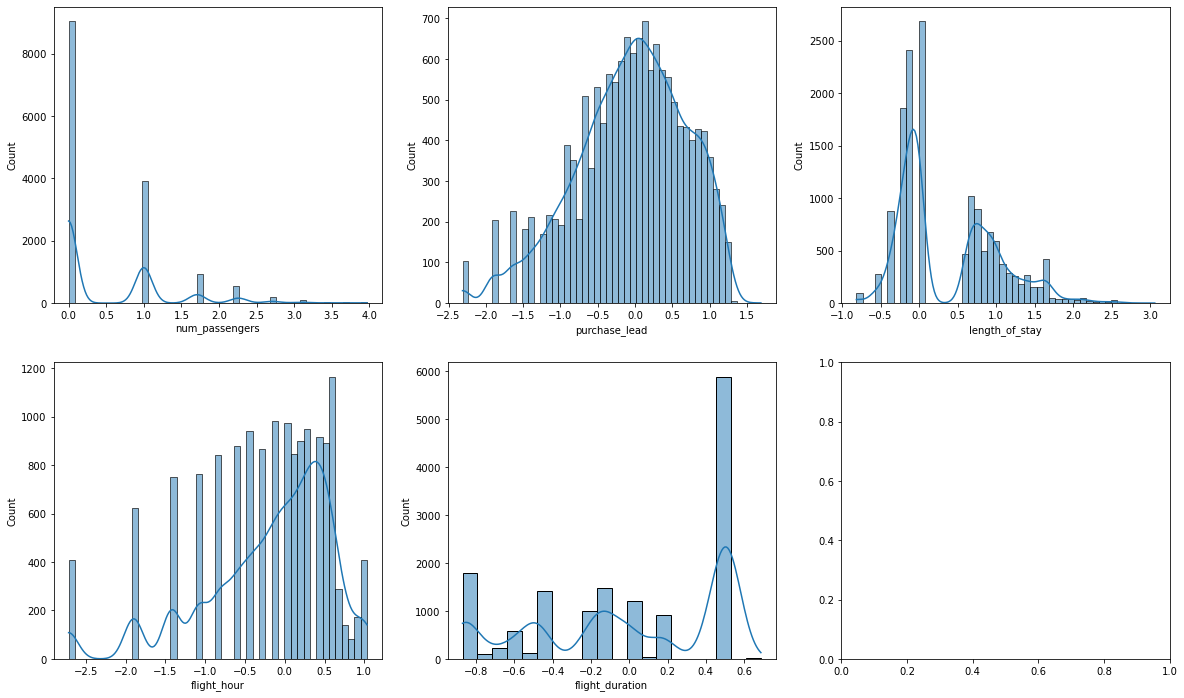

In [53]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

for col_name, ax in zip(X_scaled.columns, axs.ravel()):
    sns.histplot(data=X_scaled, x=col_name, kde=True, ax=ax)

In [54]:
# Add the temporily removed features back to X 
X_scaled = pd.concat([X_scaled, dataset[['route','trip_type','booking_origin','sales_channel','flight_day','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']]], axis=1)
X_scaled

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,route,trip_type,booking_origin,sales_channel,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
0,0.000000,-1.663091,0.000000,0.554709,-0.592248,PENPVG,RoundTrip,Malaysia,Internet,6,0,0,0
1,0.000000,-0.512805,0.000000,0.215180,-0.123096,ICNPEN,RoundTrip,Malaysia,Internet,1,1,0,0
2,0.000000,-0.194189,1.686126,-0.124349,-0.835328,JHBKTM,RoundTrip,Malaysia,Internet,3,1,0,1
3,0.000000,0.864974,-0.100069,0.983018,0.000000,KIXPEN,RoundTrip,Malaysia,Internet,5,1,0,0
4,2.259851,-0.673553,-0.100069,-1.420956,-0.123096,ICNKCH,RoundTrip,South Korea,Internet,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,0.000000,-0.036576,1.147501,0.478539,0.521059,OOLSZX,RoundTrip,Australia,Internet,6,1,0,1
7387,1.000000,0.698554,-0.218425,-1.420956,0.000000,DMKKIX,RoundTrip,Thailand,Internet,2,1,0,0
7388,0.000000,-0.409740,-0.100069,0.478539,-0.123096,CGKICN,RoundTrip,South Korea,Internet,7,0,0,1
7389,0.000000,-0.711704,0.648208,0.215180,0.521059,AKLKUL,RoundTrip,New Zealand,Internet,3,1,0,0


## Building ML model using random forest technique

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=420)
#scaler.fit(x_train)

In [56]:
x_train

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,route,trip_type,booking_origin,sales_channel,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
6975,1.709511,-0.673553,0.000000,-0.818068,-0.870768,PENTPE,RoundTrip,Malaysia,Internet,6,1,0,0
4640,0.000000,0.011706,0.922711,0.309648,0.339736,IKAPEN,RoundTrip,Malaysia,Internet,3,1,1,0
3276,0.000000,0.502549,0.899931,-0.263359,0.521059,AKLKUL,RoundTrip,Malaysia,Internet,7,1,0,0
4590,0.000000,-0.386555,-0.100069,-0.263359,0.000000,KBRKIX,RoundTrip,Malaysia,Internet,2,1,1,1
4816,0.000000,-0.571968,0.966005,-1.081427,0.521059,DMKOOL,RoundTrip,Australia,Internet,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5696,0.000000,-1.902773,-0.550034,0.397112,-0.221241,HKTPUS,RoundTrip,South Korea,Internet,4,0,0,1
4671,0.000000,-0.245624,-0.218425,-0.602888,-0.221241,BKIPUS,RoundTrip,South Korea,Internet,7,1,0,0
4486,0.000000,1.035031,0.613110,0.554709,0.521059,AKLKUL,RoundTrip,Malaysia,Internet,6,1,0,1
5993,0.000000,0.653350,-0.100069,0.215180,-0.478941,HKTPER,RoundTrip,Australia,Internet,1,0,0,0


In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
numerical_pipe = SimpleImputer(strategy="mean")

numerical_columns = X_scaled.columns[[0,1,2,3,4]].tolist()
categorical_columns = X_scaled.columns[[5,6,7, 8, 9,10,11,12]].tolist()


preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

rf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)
rf.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['route', 'trip_type',
                                                   'booking_origin',
                                                   'sales_channel',
                                                   'flight_day',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals']),
                                                 ('num', SimpleImputer(),
                                                  ['num_passengers',
                                                   'purchase_lead',
              

In [83]:
from sklearn.model_selection import train_test_split, KFold
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(11086, 13)

(3696, 13)

(11086,)

(3696,)

In [84]:
# Model Valuation
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics
y_pred=rf.predict(x_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1687
           1       0.74      0.68      0.71      2009

    accuracy                           0.69      3696
   macro avg       0.69      0.70      0.69      3696
weighted avg       0.70      0.69      0.69      3696



In [85]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=42
)

In [86]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(rf, X_scaled, y, cv=10, scoring=scoring, n_jobs=-1)
cv_results=pd.DataFrame(cv_results)
cv_results.mean()

fit_time          2.838385
score_time        0.105372
test_accuracy     0.696861
test_precision    0.685009
test_recall       0.729263
test_f1           0.706372
dtype: float64

In [62]:
# Model Tuning
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],  # Example values for n_estimators
    'classifier__min_samples_split': [2, 5, 10],  # Example values for min_samples_split
}

gs = GridSearchCV(rf, param_grid, scoring=scoring, cv=cv, n_jobs=3, verbose=5, refit=False)
gs_result = gs.fit(X_scaled, y)

Fitting 50 folds for each of 9 candidates, totalling 450 fits


In [88]:
gs_result

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['route',
                                                                          'trip_type',
                                                                          'booking_origin',
                                                                          'sales_channel',
                                                                          'flight_day',
                                                                          'wants_extra_baggage',
                       

In [89]:
gs_result.cv_results_

{'mean_fit_time': array([1.13138981, 2.41174191, 3.32003602, 1.33834899, 2.76687806,
        3.65418671, 1.36684545, 2.08352012, 3.20525687]),
 'std_fit_time': array([0.05660278, 0.41188638, 0.13927786, 0.31189064, 0.35807232,
        0.48233043, 0.29695845, 0.17947946, 0.20925871]),
 'mean_score_time': array([0.09086474, 0.16682101, 0.19571704, 0.10789065, 0.19178438,
        0.21222143, 0.11074068, 0.14289247, 0.20212512]),
 'std_score_time': array([0.01280277, 0.07555701, 0.01595147, 0.04232648, 0.06625834,
        0.022344  , 0.02992882, 0.02896295, 0.02516253]),
 'param_classifier__min_samples_split': masked_array(data=[2, 2, 2, 5, 5, 5, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_classifier__n_estimators': masked_array(data=[50, 100, 150, 50, 100, 150, 50, 100, 150],
              mask=[False, False, False, False, False, False, False, False,
       

In [90]:
gs_result_df = pd.DataFrame(gs_result.cv_results_)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split43_test_f1,split44_test_f1,split45_test_f1,split46_test_f1,split47_test_f1,split48_test_f1,split49_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,1.131390,0.056603,0.090865,0.012803,2,50,"{'classifier__min_samples_split': 2, 'classifi...",0.684816,0.683463,0.683694,...,0.694399,0.680980,0.702346,0.689977,0.706851,0.689353,0.708869,0.696000,0.008173,9
1,2.411742,0.411886,0.166821,0.075557,2,100,"{'classifier__min_samples_split': 2, 'classifi...",0.694623,0.696314,0.698241,...,0.709761,0.686497,0.705805,0.698843,0.706344,0.688021,0.722294,0.703509,0.009726,8
2,3.320036,0.139278,0.195717,0.015951,2,150,"{'classifier__min_samples_split': 2, 'classifi...",0.698343,0.691241,0.700271,...,0.714194,0.695767,0.707682,0.701581,0.709677,0.688329,0.720052,0.706165,0.009132,6
3,1.338349,0.311891,0.107891,0.042326,5,50,"{'classifier__min_samples_split': 5, 'classifi...",0.692256,0.695299,0.698579,...,0.711211,0.695795,0.705882,0.700098,0.707602,0.695652,0.712496,0.705440,0.008707,7
4,2.766878,0.358072,0.191784,0.066258,5,100,"{'classifier__min_samples_split': 5, 'classifi...",0.693270,0.693947,0.695873,...,0.717883,0.696136,0.707523,0.700591,0.709719,0.701187,0.717998,0.709214,0.008601,5
5,3.654187,0.482330,0.212221,0.022344,5,150,"{'classifier__min_samples_split': 5, 'classifi...",0.701048,0.696652,0.695535,...,0.717391,0.697674,0.711526,0.707461,0.711941,0.702632,0.721154,0.711520,0.009036,3
6,1.366845,0.296958,0.110741,0.029929,10,50,"{'classifier__min_samples_split': 10, 'classif...",0.695299,0.692932,0.706022,...,0.707246,0.690802,0.711054,0.704493,0.712116,0.699112,0.719332,0.709842,0.008960,4
7,2.083520,0.179479,0.142892,0.028963,10,100,"{'classifier__min_samples_split': 10, 'classif...",0.699357,0.698005,0.705345,...,0.713648,0.701605,0.718942,0.708034,0.718114,0.701674,0.725522,0.714405,0.009128,2
8,3.205257,0.209259,0.202125,0.025163,10,150,"{'classifier__min_samples_split': 10, 'classif...",0.703754,0.698343,0.704668,...,0.719215,0.703003,0.721920,0.711111,0.716629,0.703196,0.722506,0.715856,0.009075,1


In [91]:
params = gs_result_df['params'].apply(pd.Series)
params

,classifier__min_samples_split,classifier__n_estimators
0,2,50
1,2,100
2,2,150
3,5,50
4,5,100
5,5,150
6,10,50
7,10,100
8,10,150


In [92]:
gs_result_df = gs_result_df.join(params)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split45_test_f1,split46_test_f1,split47_test_f1,split48_test_f1,split49_test_f1,mean_test_f1,std_test_f1,rank_test_f1,classifier__min_samples_split,classifier__n_estimators
0,1.131390,0.056603,0.090865,0.012803,2,50,"{'classifier__min_samples_split': 2, 'classifi...",0.684816,0.683463,0.683694,...,0.702346,0.689977,0.706851,0.689353,0.708869,0.696000,0.008173,9,2,50
1,2.411742,0.411886,0.166821,0.075557,2,100,"{'classifier__min_samples_split': 2, 'classifi...",0.694623,0.696314,0.698241,...,0.705805,0.698843,0.706344,0.688021,0.722294,0.703509,0.009726,8,2,100
2,3.320036,0.139278,0.195717,0.015951,2,150,"{'classifier__min_samples_split': 2, 'classifi...",0.698343,0.691241,0.700271,...,0.707682,0.701581,0.709677,0.688329,0.720052,0.706165,0.009132,6,2,150
3,1.338349,0.311891,0.107891,0.042326,5,50,"{'classifier__min_samples_split': 5, 'classifi...",0.692256,0.695299,0.698579,...,0.705882,0.700098,0.707602,0.695652,0.712496,0.705440,0.008707,7,5,50
4,2.766878,0.358072,0.191784,0.066258,5,100,"{'classifier__min_samples_split': 5, 'classifi...",0.693270,0.693947,0.695873,...,0.707523,0.700591,0.709719,0.701187,0.717998,0.709214,0.008601,5,5,100
5,3.654187,0.482330,0.212221,0.022344,5,150,"{'classifier__min_samples_split': 5, 'classifi...",0.701048,0.696652,0.695535,...,0.711526,0.707461,0.711941,0.702632,0.721154,0.711520,0.009036,3,5,150
6,1.366845,0.296958,0.110741,0.029929,10,50,"{'classifier__min_samples_split': 10, 'classif...",0.695299,0.692932,0.706022,...,0.711054,0.704493,0.712116,0.699112,0.719332,0.709842,0.008960,4,10,50
7,2.083520,0.179479,0.142892,0.028963,10,100,"{'classifier__min_samples_split': 10, 'classif...",0.699357,0.698005,0.705345,...,0.718942,0.708034,0.718114,0.701674,0.725522,0.714405,0.009128,2,10,100
8,3.205257,0.209259,0.202125,0.025163,10,150,"{'classifier__min_samples_split': 10, 'classif...",0.703754,0.698343,0.704668,...,0.721920,0.711111,0.716629,0.703196,0.722506,0.715856,0.009075,1,10,150


In [93]:
mean_cols = [i for i in gs_result_df.columns if i.startswith('mean')]
rank_cols = [i for i in gs_result_df.columns if i.startswith('rank')]
gs_result_df[['classifier__min_samples_split', 'classifier__n_estimators', *mean_cols, *rank_cols]]

,classifier__min_samples_split,classifier__n_estimators,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_accuracy,rank_test_precision,rank_test_recall,rank_test_f1
0,2,50,1.131390,0.090865,0.690536,0.683960,0.708700,0.696000,9,5,9,9
1,2,100,2.411742,0.166821,0.695021,0.684433,0.723884,0.703509,7,3,8,8
2,2,150,3.320036,0.195717,0.696320,0.684005,0.730017,0.706165,6,4,7,6
3,5,50,1.338349,0.107891,0.694608,0.681271,0.731586,0.705440,8,9,6,7
4,5,100,2.766878,0.191784,0.697260,0.682293,0.738574,0.709214,5,8,5,5
5,5,150,3.654187,0.212221,0.699175,0.683470,0.742197,0.711520,3,6,3,3
6,10,50,1.366845,0.110741,0.697646,0.682341,0.739874,0.709842,4,7,4,4
7,10,100,2.083520,0.142892,0.701489,0.684774,0.746947,0.714405,2,1,2,2
8,10,150,3.205257,0.202125,0.702280,0.684634,0.750278,0.715856,1,2,1,1


Based on the above result of gridsearch CV, the combination of 'classifier__min_samples_split' and 'classifier__n_estimators' that yield the best evaluation metrics score on average is (10,300) with the highest ranking of mean scores for test_accuracy, test_precision, test_recall and test_f1 (0.700771 	0.682905 	0.749730 	0.714666 )

## Continue model tuning through better features selection

In [94]:
len(rf.named_steps['classifier'].feature_importances_)

13

In [95]:
features = pd.DataFrame()
features = pd.DataFrame(index=X_scaled.columns)

# Get the estimator (RandomForestClassifier) from the pipeline
rf_estimator = rf.named_steps['classifier']

# Access the feature importances from the estimator
features['importance'] = rf_estimator.feature_importances_

In [96]:
features

,importance
num_passengers,0.148896
purchase_lead,0.002584
length_of_stay,0.153583
flight_hour,0.014500
flight_duration,0.081972
route,0.018588
trip_type,0.018895
booking_origin,0.021633
sales_channel,0.044672
flight_day,0.166664


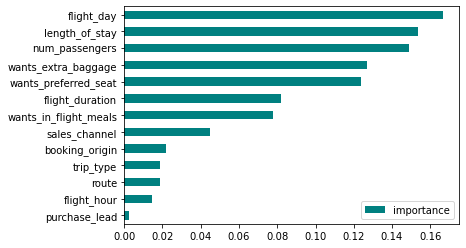

In [97]:
features.sort_values(by=['importance'],ascending=True).plot(kind='barh', color= 'teal')
plt.show()

After getting the feature importances from rf model which ranges between 0.01 and 0.208, it is indicated that some features have quite low predictive power. Features with low importance values contribute less additional information to the model when predicting the target variable. They may not provide unique or significant insights into the target variable's behavior. Therefore, in this case feature removal might make sense. After that, it'd be a good tactics to perform feature selection and evaluate its impact on model performance using techniques like cross-validation before deciding to exclude features. 

In [ ]:
# Try 1 : Remove features having feature importance below 0.1: (['wants_in_flight_meals','sales_channel','booking_origin','flight_duration','flight_hour','purchase_lead'])
